## Support Vector Machine Model 

### Problem Statement

A classic problem in the field of pattern recognition is that of 
#### handwritten digit recognition. 
Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities. 

The goal is to develop a model that can correctly identify the digit (between 0-9) written in an image.

#### Objective
We are required to develop a model using Support Vector Machine which should correctly classify the handwritten digits from 0-9 based on the pixel values given as features. Thus, this is a 10-class classification problem. 

For this problem, we use the MNIST data which is a large database of handwritten digits. The 'pixel values' of each digit (image) comprise the features, and the actual number between 0-9 is the label. 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale



In [2]:
# Read the dataset
digits = pd.read_csv("train.csv")
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 1. Basic Data Exploration

In [3]:
digits.shape

(42000, 785)

##### A sample digit

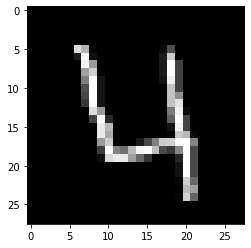

In [4]:
sample_digit = digits.iloc[3,1:]
sample_digit.shape
sample_digit = sample_digit.values.reshape(28,28)
plt.imshow(sample_digit, cmap='gray')

In [5]:
print(digits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [6]:
digits.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [7]:
print(digits.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [8]:
np.sort(digits.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [9]:
digits[digits.isnull().sum(axis=1) > 0]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


##### No missing values in the data set

In [10]:
digits.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

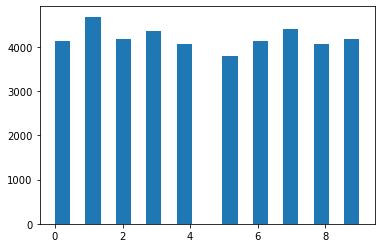

In [11]:
# simple density plot
plt.hist(digits['label'], bins=20)
plt.show()


##### All the digits are distrubuted more or less uniformly with similar population

#### 2. Data Preparation

##### Considering the computational limitations, let us use just 20000 images from the data set for training

In [12]:
X = digits.drop('label', axis=1)
X = X.iloc[0:20000, :]
X.shape

(20000, 784)

In [13]:
y = digits.label[0:20000]

In [14]:
# Test, Train Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [15]:
print(X_train.shape)
print(len(y_train))

(14000, 784)
14000


##### Re-Scale and standardize the pixel values as they are in varying ranges

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

#### 3. Model Building

##### Let's start with the simplest SVM model - Linear without hyper-parameters

In [17]:
linear_model = SVC(kernel='linear')
linear_model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
#### Apply the re-scaling to X_test before prediction
X_test = scaler.transform(X_test)

In [19]:
y_pred = linear_model.predict(X_test)
y_pred

array([5, 3, 1, ..., 6, 2, 0], dtype=int64)

In [20]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9123333333333333 

[[561   0   2   0   1   3   5   0   3   0]
 [  0 696   3   1   0   0   1   4   2   1]
 [  6   7 564  13   3   2   5   4  11   0]
 [  0   4  21 535   0  18   4   3  22   4]
 [  2   2   7   1 542   0   6   5   0  18]
 [  5   3   6  31   7 430   7   0  12   3]
 [  8   0   9   0   3  15 557   0   3   0]
 [  1   3   7   5   9   1   0 557   2  29]
 [  4  16  10  27   5  16   2   4 507   8]
 [  2   2   3   5  26   4   0  24   5 525]]


##### The simple linear SVM model gives a very good accuracy of 91% and confusion matrix diagonal values indicate all the digits have been predicted almost correctly.

##### Let us try a non-linear model with RBF kernel

In [21]:
nonlinear_model = SVC(kernel='rbf')
nonlinear_model.fit(X_train, y_train)

SVC()

In [22]:
y_pred2 = nonlinear_model.predict(X_test)
y_pred2

array([5, 3, 1, ..., 6, 2, 0], dtype=int64)

In [23]:
# confusion matrix and accuracy

# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred2), "\n")

# cm
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred2))

accuracy: 0.9473333333333334 

[[557   0   9   1   0   2   3   0   3   0]
 [  0 692   8   1   0   0   2   4   1   0]
 [  4   4 587   4   0   1   3   5   6   1]
 [  0   2  23 566   0   3   2   4   9   2]
 [  1   1  12   0 548   1   3   1   0  16]
 [  1   0   7  14   2 465  10   0   4   1]
 [  4   0   9   0   0   4 576   0   2   0]
 [  0   4  16   4   4   0   0 574   1  11]
 [  1   2   8   5   5   5   1   4 561   7]
 [  0   1  11   3  11   0   0  11   1 558]]


##### The non-linear SVM model shows a significant improvement of accuracy to around 95% . Let us proceed with the hyper-parameter tuning on a non-linear model.

##### Grid Search: Hyperparameter Tuning¶
###### Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [ ]:
folds = KFold(n_splits = 5, shuffle = True, random_state=100)

hyper_params = [{'gamma': [1e-2, 1e-3, 1e-4],
                 'C': [1, 10, 100, 1000]}]

model = SVC(kernel='rbf')

cv = GridSearchCV(model, 
                  param_grid = hyper_params,
                  scoring = 'accuracy',
                  cv=folds, n_jobs=4,
                  return_train_score=True, verbose=True)

cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed: 24.5min


In [ ]:
# cv results
cv_results = pd.DataFrame(cv.cv_results_)
cv_results

In [ ]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


##### We can see that Test accuracy is high with Gamma=0.001 and C=10

In [ ]:
# printing the optimal accuracy score and hyperparameters
best_score = cv.best_score_
best_hyperparams = cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

##### Buid a model with the best values of the hyperparameters found above

In [ ]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print(metrics.confusion_matrix(y_test, y_pred), "\n")

#### Conclusion
The final accuracy on test data is approx. 96%. Note that this can be significantly increased by using the entire training data of 42,000 images (we have used just nearly half of that!).